# Assigment: Effect of regularisation on accuracy-fairness trade-off

## Init

In [1]:
import pandas as pd
from dataset import Dataset
from models import LogisticRegressionClassifier
from analysis import Analysis

In [2]:
adult_ds = Dataset(dataset_name="adult")
german_ds = Dataset(dataset_name="german")

Adult Dataset initialized
German Dataset initialized


In [3]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1]

# Adult Income Dataset

In [4]:
selected_dataset = adult_ds
X_train, y_train, X_test, y_test = selected_dataset.get_data()

## Running through Solvers and Penalties

In [5]:
models = [{'solver': "saga", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "saga", "params":{'penalty': "l1", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "saga", "params":{'penalty': "elasticnet", 'C': 1, 'max_iter': 1000, 'tol': 1e-4, 'l1_ratio': 0.5}},
          {'solver': "saga", "params":{'penalty': "none"}},
          {'solver': "sag", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "sag", "params":{'penalty': "none"}},
          {'solver': "liblinear", "params":{'penalty': "l1", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "liblinear", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "lbfgs", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "lbfgs", "params":{'penalty': "none"}},
          {'solver': "newton-cg", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "newton-cg", "params":{'penalty': "none"}}]

In [6]:
results = []

for model in models:
    clf = LogisticRegressionClassifier(verbose=False, dataset=selected_dataset, solver=model['solver'], params=model['params'], privileged_groups=selected_dataset.privileged_groups, unprivileged_groups=selected_dataset.unprivileged_groups)
    print("Running model: " + str(clf.__class__.__name__) + " solver " + model['solver'] + " with " + str(model['params']['penalty']) + " regularization")
    results.append((model['solver'] + "_" + str(model['params']['penalty']), *clf.run(selected_dataset)))


Running model: LogisticRegressionClassifier solver saga with l2 regularization
Running model: LogisticRegressionClassifier solver saga with l1 regularization
Running model: LogisticRegressionClassifier solver saga with elasticnet regularization
Running model: LogisticRegressionClassifier solver saga with none regularization


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


Running model: LogisticRegressionClassifier solver sag with l2 regularization
Running model: LogisticRegressionClassifier solver sag with none regularization


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


Running model: LogisticRegressionClassifier solver liblinear with l1 regularization
Running model: LogisticRegressionClassifier solver liblinear with l2 regularization
Running model: LogisticRegressionClassifier solver lbfgs with l2 regularization
Running model: LogisticRegressionClassifier solver lbfgs with none regularization
Running model: LogisticRegressionClassifier solver newton-cg with l2 regularization
Running model: LogisticRegressionClassifier solver newton-cg with none regularization


In [7]:
print("Solver-Penalty Test")

# display results
df = pd.DataFrame(results, columns=['model', 'accuracy', 'std', 'fairness_metric'])
df = df.sort_values(by=['accuracy'], ascending=False) # sort by accuracy

# show
df

Solver-Penalty Test


,model,accuracy,std,fairness_metric
0,saga_l2,0.804001,0.00434,-0.464784
1,saga_l1,0.804001,0.00434,-0.464784
2,saga_elasticnet,0.804001,0.00434,-0.464784
3,saga_none,0.804001,0.00434,-0.464784
4,sag_l2,0.804001,0.00434,-0.464784
5,sag_none,0.804001,0.00434,-0.464784
6,liblinear_l1,0.804001,0.00434,-0.464784
7,liblinear_l2,0.804001,0.00434,-0.464784
8,lbfgs_l2,0.804001,0.00434,-0.464784
9,lbfgs_none,0.804001,0.00434,-0.464784


## Task 1: Machine Learning Based Model


### Hyperparameter search over C (Lambda)

- Solver: liblinear
- Dataset: Adult
- C: 0.0001 to 0.1
- Penalty: l2

In [8]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=False)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 0
Best accuracy+fairness: None


In [9]:
print("Performance measures over hyperparameter search:")
analysis['data_frame']

Performance measures over hyperparameter search:


,model,accuracy,accuracy_std,fairness
0,0.0001,0.797216,0.005006,-0.242389
1,0.0010,0.803387,0.004469,-0.454879
2,0.0100,0.803914,0.004465,-0.462947
3,0.1000,0.804001,0.004340,-0.464784
4,1.0000,0.804001,0.004340,-0.464784


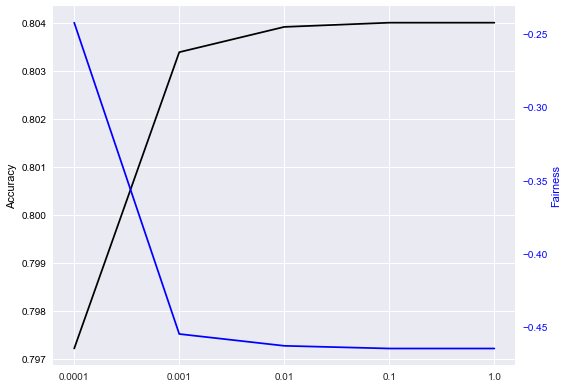

In [10]:
analyser.plot_results()

### Accuracy and Fairness on test data

__[Model 1]: Best Accuracy__

In [11]:
# Best accuracy
test_accuracy = analysis['best_accuracy_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best accuracy] Accuracy on test set: " + str(test_accuracy))
print("[Best accuracy] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))

[Best accuracy] Accuracy on test set: 0.8042039172865625
[Best accuracy] Fairness (True Positive Rate Difference) on test set: -0.4414141414141414


__[Model 2]: Best Fairness__

In [12]:
# Best fairness
test_accuracy = analysis['best_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best fairness] Accuracy on test set: " + str(test_accuracy))
print("[Best fairness] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))

[Best fairness] Accuracy on test set: 0.7984030573943902
[Best fairness] Fairness (True Positive Rate Difference) on test set: -0.2472160630697216


## Task 2: Fairness Based Model

### Bias mitigation using reweighing

In [13]:
selected_dataset.dataset_orig_train = selected_dataset.mitigate_bias(method="reweighing", dataset=selected_dataset.dataset_orig_train)

Mitigation: Reweighing complete


In [14]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=True)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 0
Best accuracy+fairness: None


In [15]:
print("Results after mitigation:")
analysis['data_frame']

Results after mitigation:


,model,accuracy,accuracy_std,fairness
0,0.0001,0.797216,0.005006,-0.009967
1,0.0010,0.803387,0.004469,-0.009967
2,0.0100,0.803914,0.004465,-0.009967
3,0.1000,0.804001,0.004340,-0.009967
4,1.0000,0.804001,0.004340,-0.009967


### Accuracy and Fairness on test data

__[Model 3]: Best Accuracy__

In [16]:
# Best accuracy
test_accuracy = analysis['best_accuracy_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best accuracy] Accuracy on test set: " + str(test_accuracy))
print("[Best accuracy] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))


[Best accuracy] Accuracy on test set: 0.7905548351873336
[Best accuracy] Fairness (True Positive Rate Difference) on test set: 0.03513180586351322


__[Model 4]: Best Fairness__

In [17]:
# Best fairness
test_accuracy = analysis['best_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best fairness] Accuracy on test set: " + str(test_accuracy))
print("[Best fairness] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))

[Best fairness] Accuracy on test set: 0.7905548351873336
[Best fairness] Fairness (True Positive Rate Difference) on test set: 0.03513180586351322


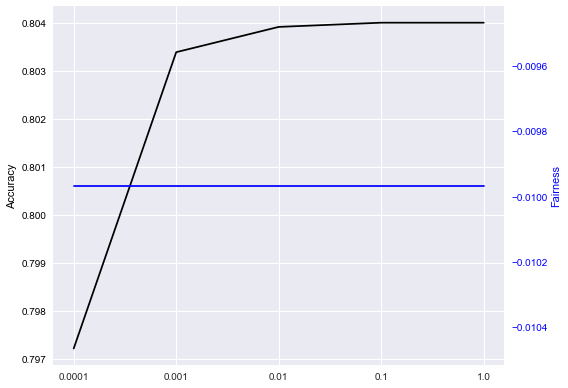

In [18]:
analyser.plot_results()

## Task 3: Accuracy + Fairness Based Model

### Machine-Learning based model using accuracy+fairness criterion

In [19]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=False, include_delta=True)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 0
Best accuracy+fairness: 0


In [20]:
analysis['data_frame']

,model,accuracy,accuracy_std,fairness,accuracy+fairness
0,0.0001,0.797216,0.005006,-0.242389,1.039605
1,0.0010,0.803387,0.004469,-0.454879,1.258646
2,0.0100,0.803914,0.004465,-0.462947,1.267241
3,0.1000,0.804001,0.004340,-0.464784,1.269078
4,1.0000,0.804001,0.004340,-0.464784,1.269078


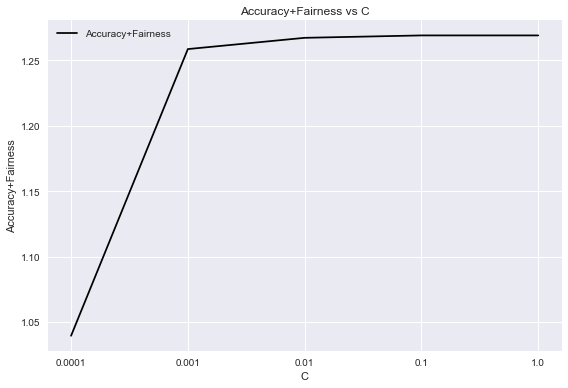

In [21]:
analyser.plot_results(type="accuracy+fairness")

### Accuracy and Fairness on test data

__[Model 5]: Best Accuracy__

In [22]:
# Best accuracy+fairness
test_accuracy = analysis['best_accuracy_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("Accuracy on test set: " + str(test_accuracy))
print("Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))


Accuracy on test set: 0.7984030573943902
Fairness (True Positive Rate Difference) on test set: -0.2472160630697216


### Fairness based model using accuracy+fairness criterion

In [23]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=True, include_delta=True)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 0
Best accuracy+fairness: 0


In [24]:
analysis['data_frame']

,model,accuracy,accuracy_std,fairness,accuracy+fairness
0,0.0001,0.797216,0.005006,-0.009967,0.799666
1,0.0010,0.803387,0.004469,-0.009967,0.799666
2,0.0100,0.803914,0.004465,-0.009967,0.799666
3,0.1000,0.804001,0.004340,-0.009967,0.799666
4,1.0000,0.804001,0.004340,-0.009967,0.799666


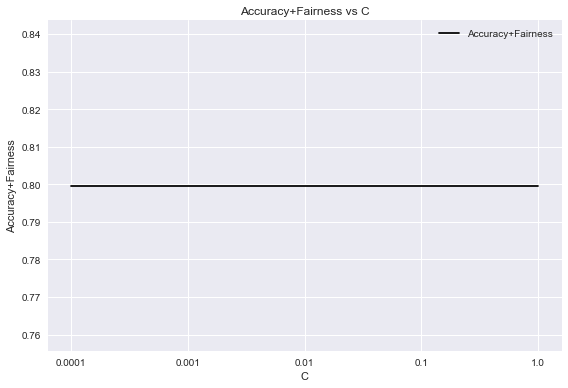

In [25]:
analyser.plot_results(type="accuracy+fairness")

### Accuracy and Fairness on test data

__[Model 6]: Best Fairness__

In [26]:
# Best accuracy+fairness
test_accuracy = analysis['best_accuracy_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("Accuracy on test set: " + str(test_accuracy))
print("Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))


Accuracy on test set: 0.7905548351873336
Fairness (True Positive Rate Difference) on test set: 0.03513180586351322


______________________________________________________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________________________________________________

______________________________________________________________________________________________________________________________________________________________

# German Census Dataset

In [27]:
selected_dataset = german_ds
X_train, y_train, X_test, y_test = selected_dataset.get_data()

## Running through Solvers and Penalties

In [28]:
models = [{'solver': "saga", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "saga", "params":{'penalty': "l1", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "saga", "params":{'penalty': "elasticnet", 'C': 1, 'max_iter': 1000, 'tol': 1e-4, 'l1_ratio': 0.5}},
          {'solver': "saga", "params":{'penalty': "none"}},
          {'solver': "sag", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "sag", "params":{'penalty': "none"}},
          {'solver': "liblinear", "params":{'penalty': "l1", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "liblinear", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "lbfgs", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "lbfgs", "params":{'penalty': "none"}},
          {'solver': "newton-cg", "params":{'penalty': "l2", 'C': 1, 'max_iter': 1000, 'tol': 1e-4}},
          {'solver': "newton-cg", "params":{'penalty': "none"}}]

In [29]:
results = []

for model in models:
    clf = LogisticRegressionClassifier(verbose=False, dataset=selected_dataset, solver=model['solver'], params=model['params'], privileged_groups=selected_dataset.privileged_groups, unprivileged_groups=selected_dataset.unprivileged_groups)
    print("Running model: " + str(clf.__class__.__name__) + " solver " + model['solver'] + " with " + str(model['params']['penalty']) + " regularization")
    results.append((model['solver'] + "_" + str(model['params']['penalty']), *clf.run(selected_dataset)))


Running model: LogisticRegressionClassifier solver saga with l2 regularization
Running model: LogisticRegressionClassifier solver saga with l1 regularization
Running model: LogisticRegressionClassifier solver saga with elasticnet regularization
Running model: LogisticRegressionClassifier solver saga with none regularization
Running model: LogisticRegressionClassifier solver sag with l2 regularization
Running model: LogisticRegressionClassifier solver sag with none regularization
Running model: LogisticRegressionClassifier solver liblinear with l1 regularization
Running model: LogisticRegressionClassifier solver liblinear with l2 regularization
Running model: LogisticRegressionClassifier solver lbfgs with l2 regularization
Running model: LogisticRegressionClassifier solver lbfgs with none regularization
Running model: LogisticRegressionClassifier solver newton-cg with l2 regularization
Running model: LogisticRegressionClassifier solver newton-cg with none regularization


In [30]:

# display results
df = pd.DataFrame(results, columns=['model', 'accuracy', 'std', 'fairness_metric'])
df = df.sort_values(by=['accuracy'], ascending=False) # sort by accuracy

# show
df

,model,accuracy,std,fairness_metric
0,saga_l2,0.692857,0.031623,-0.133386
2,saga_elasticnet,0.692857,0.031623,-0.133386
3,saga_none,0.692857,0.031623,-0.133386
4,sag_l2,0.692857,0.031623,-0.133386
5,sag_none,0.692857,0.031623,-0.133386
7,liblinear_l2,0.692857,0.031623,-0.133386
8,lbfgs_l2,0.692857,0.031623,-0.133386
9,lbfgs_none,0.692857,0.031623,-0.133386
10,newton-cg_l2,0.692857,0.031623,-0.133386
11,newton-cg_none,0.692857,0.031623,-0.133386


## Task 1: Machine Learning Based Model


### Hyperparameter search over C (Lambda)

- Solver: liblinear
- Dataset: "Adult | German"
- C: 0.0001 to 0.1
- Penalty: l2

In [31]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=False)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 4
Best accuracy+fairness: None


In [32]:
analysis['data_frame']

,model,accuracy,accuracy_std,fairness
0,0.0001,0.655714,0.023647,-0.157834
1,0.0010,0.660000,0.024578,-0.238396
2,0.0100,0.687143,0.029067,-0.294951
3,0.1000,0.695714,0.029485,-0.139268
4,1.0000,0.692857,0.031623,-0.133386


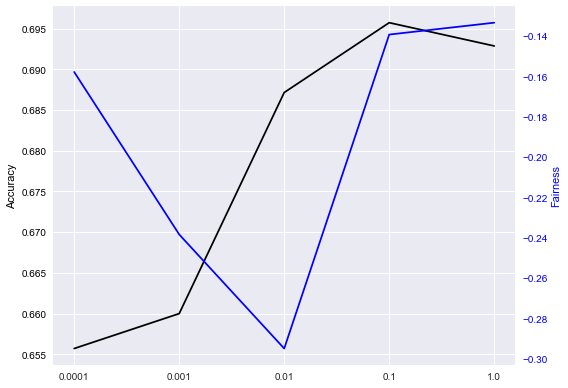

In [33]:
analyser.plot_results()

### Accuracy and Fairness on test data

__[Model 1]: Best Accuracy__

In [34]:
# Best accuracy
test_accuracy = analysis['best_accuracy_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best accuracy] Accuracy on test set: " + str(test_accuracy))
print("[Best accuracy] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))

[Best accuracy] Accuracy on test set: 0.67
[Best accuracy] Fairness (True Positive Rate Difference) on test set: -0.26812499999999995


__[Model 2]: Best Fairness__

In [35]:
# Best fairness
test_accuracy = analysis['best_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best fairness] Accuracy on test set: " + str(test_accuracy))
print("[Best fairness] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))

[Best fairness] Accuracy on test set: 0.7
[Best fairness] Fairness (True Positive Rate Difference) on test set: -0.06499999999999995


## Task 2: Fairness Based Model

### Bias mitigation using reweighing

In [36]:
selected_dataset.dataset_orig_train = selected_dataset.mitigate_bias(method="reweighing", dataset=selected_dataset.dataset_orig_train)

Mitigation: Reweighing complete


In [37]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=True)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 3
Best accuracy+fairness: None


In [38]:
print("Results after mitigation:")
analysis['data_frame']

Results after mitigation:


,model,accuracy,accuracy_std,fairness
0,0.0001,0.655714,0.023647,-0.139876
1,0.0010,0.660000,0.024578,-0.103993
2,0.0100,0.687143,0.029067,-0.044911
3,0.1000,0.695714,0.029485,0.003592
4,1.0000,0.692857,0.031623,0.047363


### Accuracy and Fairness on test data

__[Model 3]: Best Accuracy__

In [39]:
# Best accuracy
test_accuracy = analysis['best_accuracy_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best accuracy] Accuracy on test set: " + str(test_accuracy))
print("[Best accuracy] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))


[Best accuracy] Accuracy on test set: 0.7066666666666667
[Best accuracy] Fairness (True Positive Rate Difference) on test set: -0.018124999999999947


__[Model 4]: Best Fairness__

In [40]:
# Best fairness
test_accuracy = analysis['best_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("[Best fairness] Accuracy on test set: " + str(test_accuracy))
print("[Best fairness] Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))

[Best fairness] Accuracy on test set: 0.7066666666666667
[Best fairness] Fairness (True Positive Rate Difference) on test set: -0.018124999999999947


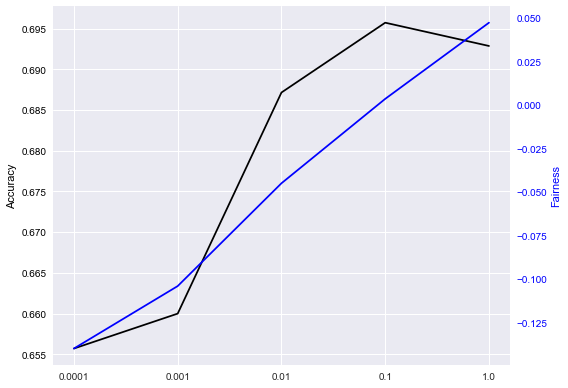

In [41]:
analyser.plot_results()

## Task 3: Accuracy + Fairness Based Model

### Machine-Learning based model using accuracy+fairness criterion

In [42]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=False, include_delta=True)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 4
Best accuracy+fairness: 0


In [43]:
analysis['data_frame']

,model,accuracy,accuracy_std,fairness,accuracy+fairness
0,0.0001,0.655714,0.023647,-0.157834,0.826405
1,0.0010,0.660000,0.024578,-0.238396,0.904111
2,0.0100,0.687143,0.029067,-0.294951,0.989237
3,0.1000,0.695714,0.029485,-0.139268,0.846411
4,1.0000,0.692857,0.031623,-0.133386,0.840529


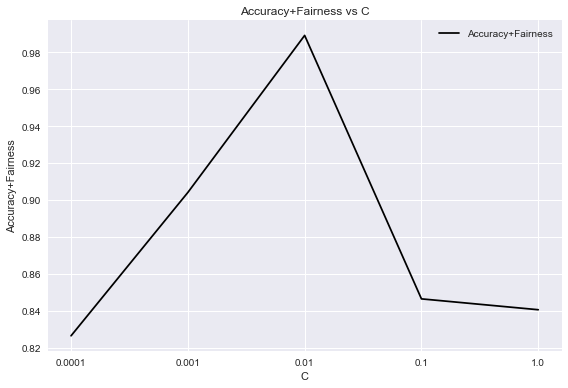

In [44]:
analyser.plot_results(type="accuracy+fairness")

### Accuracy and Fairness on test data

__[Model 5]: Best Accuracy__

In [45]:
# Best accuracy+fairness
test_accuracy = analysis['best_accuracy_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("Accuracy on test set: " + str(test_accuracy))
print("Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))


Accuracy on test set: 0.64
Fairness (True Positive Rate Difference) on test set: -0.0970833333333333


### Fairness based model using accuracy+fairness criterion

In [46]:
analyser = Analysis(dataset=selected_dataset, C_values=C_values, solver="liblinear", params={"penalty": "l2"}, mitigated=True, include_delta=True)
analysis = analyser.run()

Best accuracy: 3
Best fairness: 3
Best accuracy+fairness: 4


In [47]:
analysis['data_frame']

,model,accuracy,accuracy_std,fairness,accuracy+fairness
0,0.0001,0.655714,0.023647,-0.139876,0.809876
1,0.0010,0.660000,0.024578,-0.103993,0.773993
2,0.0100,0.687143,0.029067,-0.044911,0.752053
3,0.1000,0.695714,0.029485,0.003592,0.684979
4,1.0000,0.692857,0.031623,0.047363,0.641208


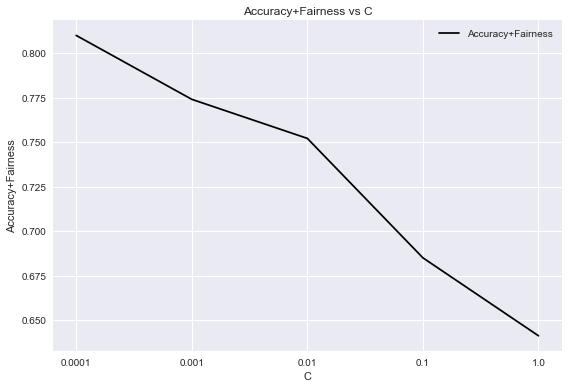

In [48]:
analyser.plot_results(type="accuracy+fairness")

### Accuracy and Fairness on test data

__[Model 6]: Best Fairness__

In [49]:
# Best accuracy+fairness
test_accuracy = analysis['best_accuracy_fairness_model'].get_accuracy(X_test, y_test)
test_fairness = analysis['best_accuracy_fairness_model'].get_fairness(selected_dataset.dataset_orig_test)

print("Accuracy on test set: " + str(test_accuracy))
print("Fairness (True Positive Rate Difference) on test set: " + str(test_fairness['eq_opp_diff']))


Accuracy on test set: 0.7166666666666667
Fairness (True Positive Rate Difference) on test set: -0.0047916666666666385
